In [ ]:
import cv2
from google.colab.patches import cv2_imshow

import numpy as np
import matplotlib.pyplot as plt

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
targetimg = cv2.imread("drive/MyDrive/PR201910794/img/lab02_people.jpg")
modelimg = cv2.imread("drive/MyDrive/PR201910794/img/lab02_modelpatch.jpg")

In [ ]:
cv2_imshow(targetimg)

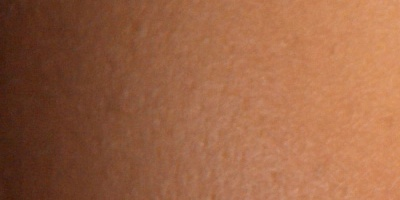

In [ ]:
cv2_imshow(modelimg)

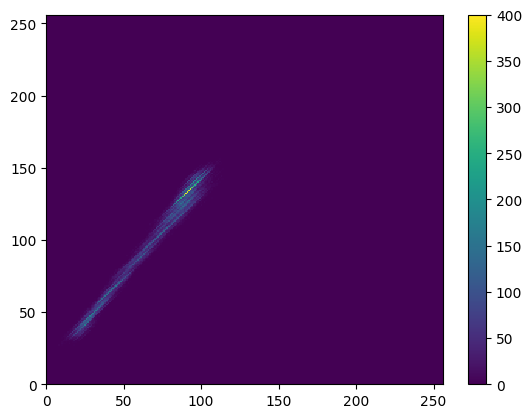

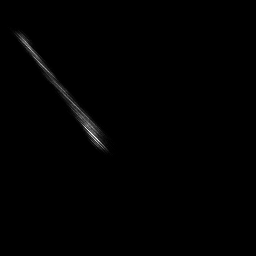

In [ ]:
## BGR 채널에서 G, R 사용
modelimg_rgb = cv2.cvtColor(modelimg, cv2.COLOR_BGR2RGB)
modelhist_rgb = cv2.calcHist([modelimg_rgb], [1,2], None, [256, 256], [0,256,0,256])
plt.pcolor(modelhist_rgb)
plt.colorbar()
plt.show()
cv2_imshow(modelhist_rgb)

In [ ]:
## Target 이미지도 BGR 채널로 변경
'''
이미지 targetimg를 BGR 채널로 변경하고
targethist_hsv 에 g와 r 채널 히스토그램 만들기

'''
targetimg_rgb = cv2.cvtColor(targetimg, cv2.COLOR_BGR2RGB)
targethist_rgb = cv2.calcHist([targetimg_rgb], [1,2], None, [256,256], [0,256,0,256])

In [ ]:
## Model과 target 이미지의 histogram 정규화
print("Max value of Model hist before normalize {}".format(modelhist_rgb.max()))
print("Max value of Target hist before normalize {}".format(modelhist_rgb.max()))

modelhist_rgb = modelhist_rgb/modelimg.size
targethist_rgb = targethist_rgb/targetimg.size

## 최대 값이 1보다 작음
print("Max value of Model hist {}".format(modelhist_rgb.max()))
print("Max value of Target hist {}".format(targethist_rgb.max()))

Max value of Model hist before normalize 400.0
Max value of Target hist before normalize 400.0
Max value of Model hist 0.0016666666666666668
Max value of Target hist 0.003755


In [ ]:
## 비율 히스토그램 생성
hist_r = modelhist_rgb/ (targethist_rgb + 1e-7)
hist_r = np.minimum(hist_r, 1.0)

In [ ]:
hist_r.shape

(256, 256)

In [ ]:
## 출력 이미지 저장을 위한 배열 생성
height, width = targetimg.shape[0], targetimg.shape[1]
output = np.zeros_like(targetimg, dtype='float32')

In [ ]:
for i in range(height):
  for j in range(width):
    '''
    비율 히스토그램을 통해
    각 pixel에 대한 confidence 구하기

    '''
    h_val = targetimg_rgb[i,j,1]
    s_val = targetimg_rgb[i,j,2]
    confidence = hist_r[h_val, s_val]
    output[i,j] = confidence

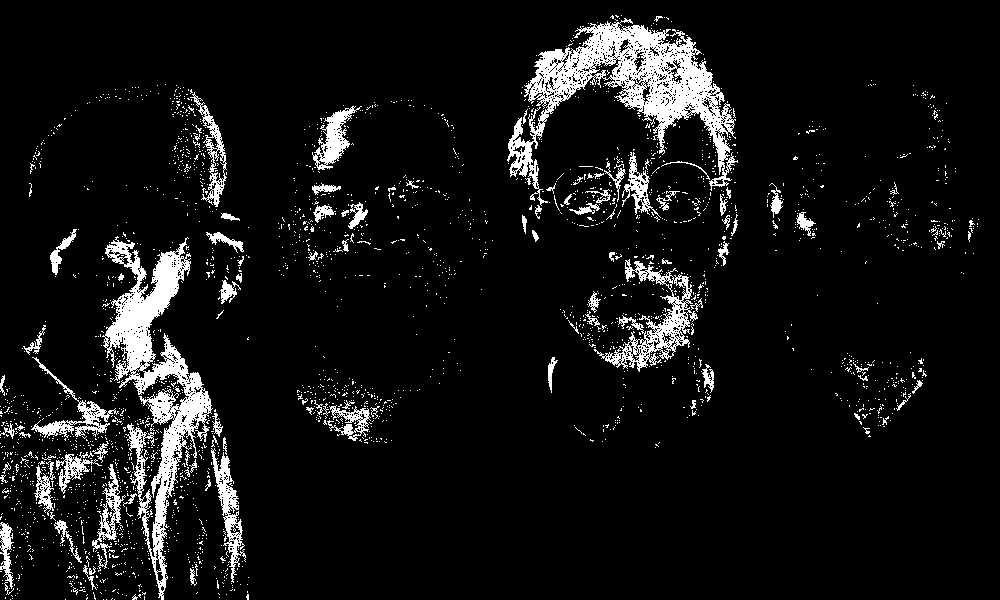

In [ ]:
ret, masked = cv2.threshold(output, 0.02, 255, cv2.THRESH_BINARY)
cv2_imshow(masked)

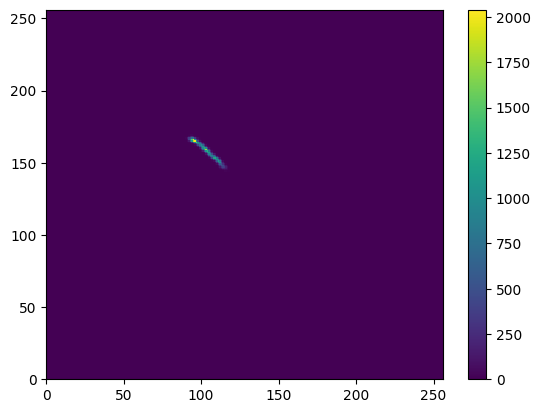

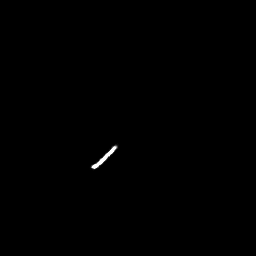

In [ ]:
## YCbCr 채널에서 Cb, Cr 사용
'''
이미지 modelimg를 YCbCr 채널로 변경하고
modelhist_ycbcr 에 Cb와 Cr 채널 히스토그램 만들기

'''
modelimg_ycbcr = cv2.cvtColor(modelimg, cv2.COLOR_BGR2YCrCb)
modelhist_ycbcr = cv2.calcHist([modelimg_ycbcr], [1,2] ,None, [256,256], [0,256,0,256])
plt.pcolor(modelhist_ycbcr)
plt.colorbar()
plt.show()

cv2_imshow(modelhist_ycbcr)

In [ ]:
## Target 이미지도 YCbCr 채널로 변경
'''
이미지 targetimg를 YCbCr 채널로 변경하고
targethist_hsv 에 cb와 cr 채널 히스토그램 만들기

'''
targetimg_ycbcr = cv2.cvtColor(targetimg, cv2.COLOR_BGR2YCrCb)
targethist_ycbcr = cv2.calcHist([targetimg_ycbcr], [1,2], None, [256,256], [0,256,0,256])

In [ ]:
## Model과 target 이미지의 histogram 정규화
print("Max value of Model hist before normalize {}".format(modelhist_ycbcr.max()))
print("Max value of Target hist before normalize {}".format(modelhist_ycbcr.max()))

modelhist_ycbcr = modelhist_ycbcr/modelimg.size
targethist_ycbcr = targethist_ycbcr/targetimg.size

## 최대 값이 1보다 작음
print("Max value of Model hist {}".format(modelhist_ycbcr.max()))
print("Max value of Target hist {}".format(targethist_ycbcr.max()))

Max value of Model hist before normalize 2041.0
Max value of Target hist before normalize 2041.0
Max value of Model hist 0.008504166666666667
Max value of Target hist 0.04588166666666667


In [ ]:
## 비율 히스토그램 생성
hist_r = modelhist_ycbcr/ (targethist_ycbcr + 1e-7)
hist_r = np.minimum(hist_r, 1.0)

In [ ]:
hist_r.shape

(256, 256)

In [ ]:
## 출력 이미지 저장을 위한 배열 생성
height, width = targetimg.shape[0], targetimg.shape[1]
output = np.zeros_like(targetimg, dtype='float32')

In [ ]:
for i in range(height):
  for j in range(width):
    '''
    비율 히스토그램을 통해
    각 pixel에 대한 confidence 구하기

    '''
    h_val = targetimg_ycbcr[i,j,1]
    s_val = targetimg_ycbcr[i,j,2]
    confidence = hist_r[h_val, s_val]
    output[i,j] = confidence

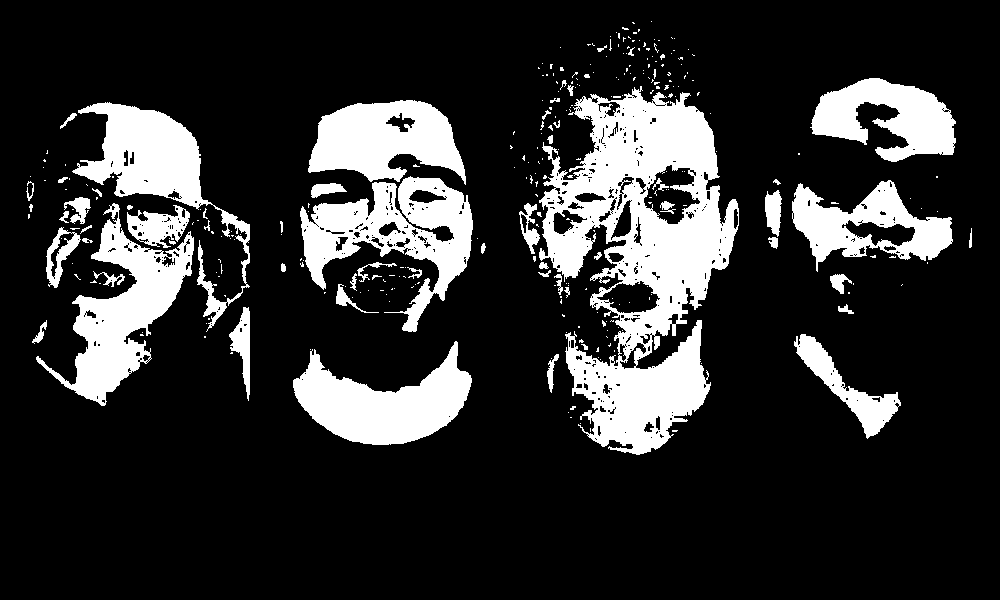

In [ ]:
ret, masked = cv2.threshold(output, 0.02, 255, cv2.THRESH_BINARY)
cv2_imshow(masked)

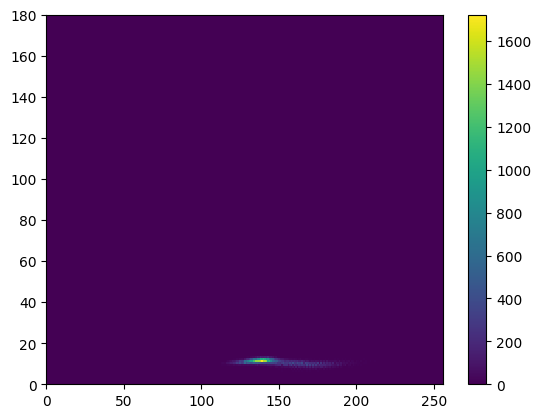

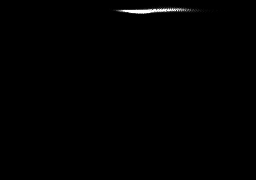

In [ ]:
## HSV 채널에서 H, S 사용
'''
이미지 modelimg를 HSV 채널로 변경하고
modelhist_hsv 에 H와 S 채널 히스토그램 만들기

'''
modeling_hsv = cv2.cvtColor(modelimg, cv2.COLOR_BGR2HSV)
modelhist_hsv = cv2.calcHist([modeling_hsv], [0,1], None, [180,256], [0,180,0,256])
plt.pcolor(modelhist_hsv)
plt.colorbar()
plt.show()

cv2_imshow(modelhist_hsv)

In [ ]:
## Target 이미지도 HSV 채널로 변경
'''
이미지 targetimg를 HSV 채널로 변경하고
targethist_hsv 에 H와 S 채널 히스토그램 만들기

'''
targetimg_hsv = cv2.cvtColor(targetimg, cv2.COLOR_BGR2HSV)
targethist_hsv = cv2.calcHist([targetimg_hsv], [0,1], None, [180,256], [0,180,0,256])

In [ ]:
## Model과 target 이미지의 histogram 정규화
print("Max value of Model hist before normalize {}".format(modelhist_hsv.max()))
print("Max value of Target hist before normalize {}".format(modelhist_hsv.max()))

modelhist_hsv = modelhist_hsv/modelimg.size
targethist_hsv = targethist_hsv/targetimg.size

## 최대 값이 1보다 작음
print("Max value of Model hist {}".format(modelhist_hsv.max()))
print("Max value of Target hist {}".format(targethist_hsv.max()))

Max value of Model hist before normalize 1723.0
Max value of Target hist before normalize 1723.0
Max value of Model hist 0.007179166666666667
Max value of Target hist 0.04588166666666667


In [ ]:
## 비율 히스토그램 생성
hist_r = modelhist_hsv/ (targethist_hsv + 1e-7)
hist_r = np.minimum(hist_r, 1.0)

In [ ]:
hist_r.shape

(180, 256)

In [ ]:
## 출력 이미지 저장을 위한 배열 생성
height, width = targetimg.shape[0], targetimg.shape[1]
output = np.zeros_like(targetimg, dtype='float32')

In [ ]:
for i in range(height):
  for j in range(width):
    '''
    비율 히스토그램을 통해
    각 pixel에 대한 confidence 구하기

    '''
    h_val = targetimg_hsv[i,j,0]
    s_val = targetimg_hsv[i,j,1]
    confidence = hist_r[h_val, s_val]
    output[i,j] = confidence

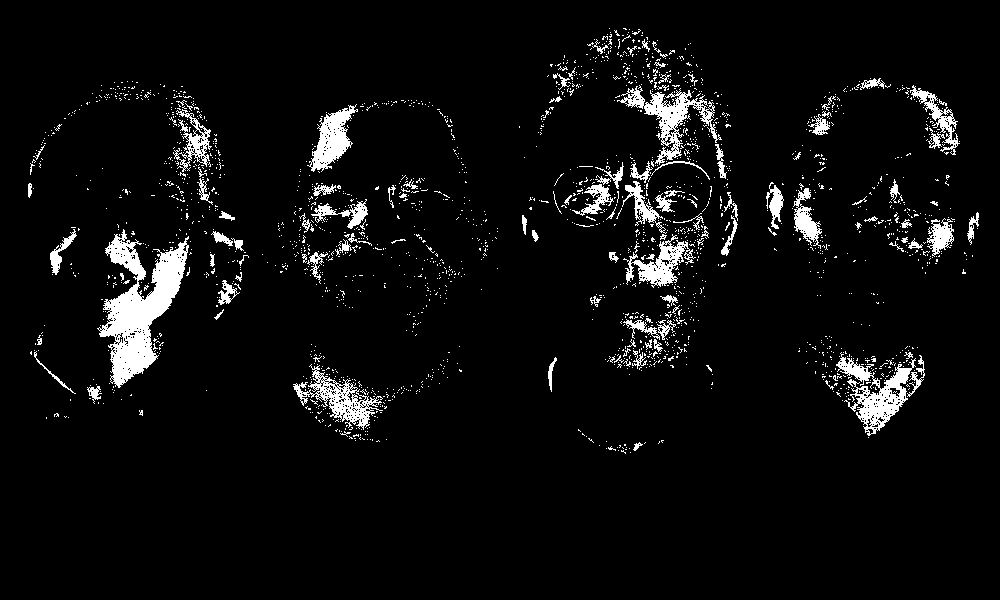

In [ ]:
ret, masked = cv2.threshold(output, 0.02, 255, cv2.THRESH_BINARY)
cv2_imshow(masked)